# Machine Learning Algorithms

## 2.1 Dimensionality Reduction

### Manifold Learning
- High-dimensional datasets can be very difficult to visualize
- While data in two or three dimensions can be plotted to show the inherent structure of the data, equivalent high-dimensional plots are much less intuitive
- Use dimensionality reduction

We can use supervised and unsupervised linear dimensionality reduction frameworks such as PCA, ICA, LDA (Linear Discriminant Analysis)
- These methods can be powerful, but often miss important non-linear structures
- Manifold Learning is an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data

There is a lot of literature and many algorithms. We will not cover all of them in details. Just a few of them are listed below;
- Isomap
- Locally Linear Embedding(including modified variant)
- Hessian Eigenmapping
- Spectral Embedding
- Local Tangent Space Alignment (LTSA)
- Multi-dimensional Scaling (MDS)
- t-distributed Stochastic Neighbor Embedding (t-SNE)

Examine the graph below. Each has its specific 2D representation below 

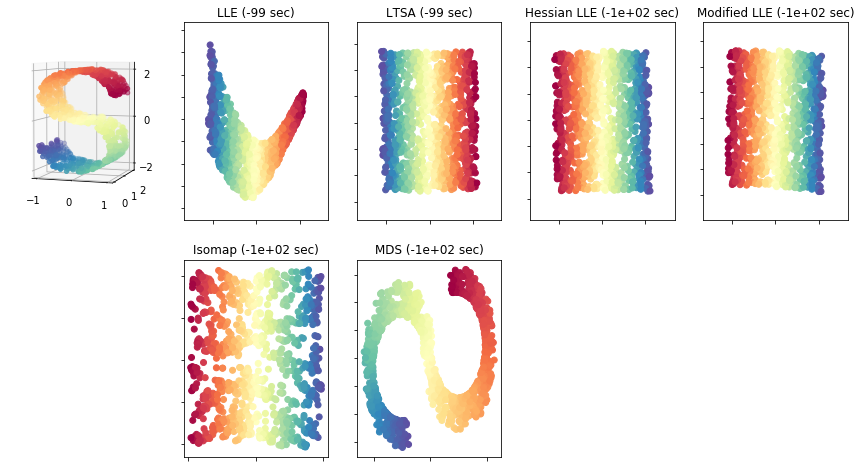

In [6]:
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method=method).fit_transform(X)

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)

ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)

ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

## 2.2 Decomposition

### Principal component analysis (PCA)
- PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance
- Linear transformation
- First PCA factor is the linear combination of your features that has the highest variance

*Parameter whiten=True allows projection of data onto the singular space while scaling each component to unit variance (only is signal is isotropic (equal in strength in every direction)*

### Linear and Quadratic Discriminant Analysis (LDA and QDA)
- LDA and QDA tries to identify attributes that account for the most variance between classes
- Supervised method which can be used as dimesionality reduction methods

##### Advantages
- Attractive because they are closed-form solutions (so easily computed)
- Low hyperparameters to tune

##### Disadvantages
- LDA can overfit (supervised technique, especially for high dimensional data (covariance cannot be estimated effectively for wide datasets)
- LDA not applicable for non-linear data (but QDA can handle quadratic)
- Sensitive to unbalaned datasets (as we saw in supervised learning)


explained variance ratio (first two components): [0.92461621 0.05301557]


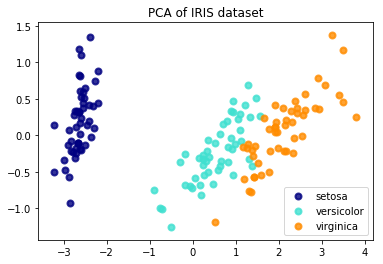

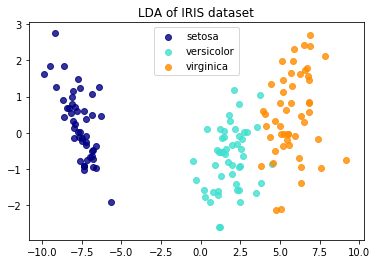

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X) # unsupervised

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X) # supervised

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'% str(pca.explained_variance_ratio_))

plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

### Kernel PCA
- An extension of PCA which achieves non-linear dimensionality reduction through the use of kernels (as seen with SVMs)
- Applications including denoising, compression and structured prediction (kernel dependency estimation)

*Quick example to SVD https://en.wikipedia.org/wiki/Singular_value_decomposition 

### Independent component analysis (ICA)
- ICA separates a multivariate signal into additive subcomponents that are maximally independent
- Typically, ICA is not used for reducing dimensionality but for separating superimposed signals (blind source separation)
- Linear separation method (cannot decompose non-linear signal mix)
- Since the ICA model does not include a noise term, whitening must be applied
 - Whiten(or sphere) - means to remove any correlations in the data (covariance matrik is diagonal; no covaraince just variance)
- ICA separates sources by maximizing their non-Gaussianity, perfect Gaussian sources can not be separated

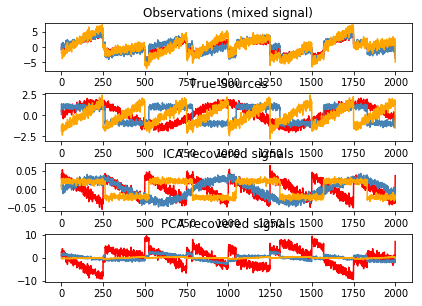

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3] # concatenate...
S += 0.2 * np.random.normal(size=S.shape)  # ...add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()